# Zadanie 2

##Utwórz kopię pliku na swoim dysku google. Zmień nazwę na R_Zadanie_2_imię_nazwisko.jpynb

## Zaimportuj pakiet Tidiverse

In [ ]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(tidyr)

##Wczytaj plik
przygotowany na poprzednich zajęciach new_cocoa_imie_nazwisko.csv

In [ ]:
dane <- read.csv("new_cocoa_grabowska_paulina.csv")
head(dane)

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Broad_Bean_Origin,Gorzka
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,A. Morin,Agua Grande,1876,2016,63,France,3.75,Sao Tome,Nie
2,A. Morin,Kpime,1676,2015,70,France,2.75,Togo,Tak
3,A. Morin,Atsane,1676,2015,70,France,3.00,Togo,Tak
4,A. Morin,Akata,1680,2015,70,France,3.50,Togo,Tak
5,A. Morin,Quilla,1704,2015,70,France,3.50,Peru,Tak
6,A. Morin,Carenero,1315,2014,70,France,2.75,Venezuela,Tak


## Statystyki opisowe i tabele liczności

Oblicz postawowe statystyki opisowe dla zmiennych numerycznych oraz tabele liczności dla zmiennych kategorycznych

In [ ]:
summary(dane)

   Company          Specific_Bean_Origin_or_Bar_Name      REF      
 Length:1721        Length:1721                      Min.   :   5  
 Class :character   Class :character                 1st Qu.: 607  
 Mode  :character   Mode  :character                 Median :1089  
                                                     Mean   :1052  
                                                     3rd Qu.:1514  
                                                     Max.   :1952  
  Review_Date   Cocoa_Percentage Company_Location       Rating     
 Min.   :2006   Min.   : 42.00   Length:1721        Min.   :1.000  
 1st Qu.:2010   1st Qu.: 70.00   Class :character   1st Qu.:3.000  
 Median :2013   Median : 70.00   Mode  :character   Median :3.250  
 Mean   :2012   Mean   : 71.72                      Mean   :3.196  
 3rd Qu.:2015   3rd Qu.: 75.00                      3rd Qu.:3.500  
 Max.   :2017   Max.   :100.00                      Max.   :5.000  
 Broad_Bean_Origin     Gorzka         
 Length:1

Wykonaj histogram dla zmiennej *Rating*

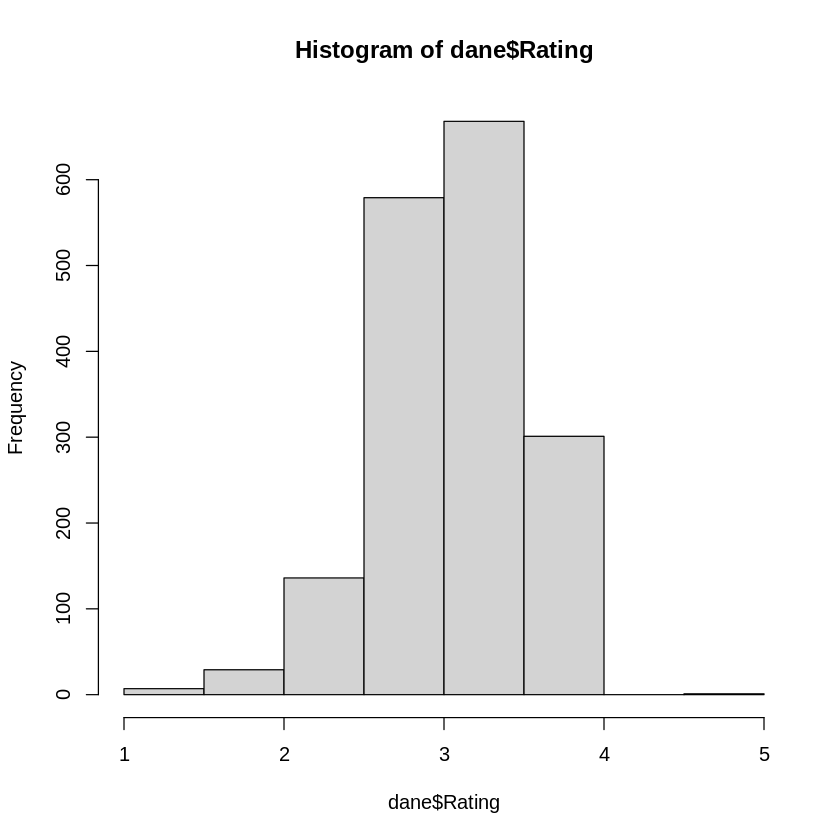

In [ ]:
hist(dane$Rating)

## EDA (Exploratory Data Analysis)
Przeprowadź eksploracyjną analizę danych. Spróbuj zaprezentować tak dane (wykresy lub tabele) aby odpowiedzieć na postawione poniżej pytania.

## PYTANIE 1 - Który kraj jest największym producentem czekolady?

In [ ]:
kraj <- dane %>%
    group_by(Company_Location) %>%
    summarise(number_wystapien = n()) %>%
    arrange(desc(number_wystapien))

  head(kraj)

Company_Location,number_wystapien
<chr>,<int>
U.S.A.,737
France,144
Canada,117
U.K.,95
Ecuador,54
Italy,54


## PYTANIE 2 – Czy ocena zalezy od zawartości kako w czekoladzie?

In [ ]:
ggplot(dane, aes(x = Cocoa_Percentage, y = Rating)) +
  geom_point(color = "darkgreen") +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Zależność oceny od zawartości kakao", x = "Zawartość kakao (%)", y = "Ocena") +
  theme_minimal()

## PYTANIE 3 - Jakie są trendy produkcji czekolady zwykłej i gorzkiej na rynku światowym? Czy któryś z tych rodzajów jest bardziej popularny?

`summarise()` has grouped output by 'Review_Date'. You can override using the
`.groups` argument.


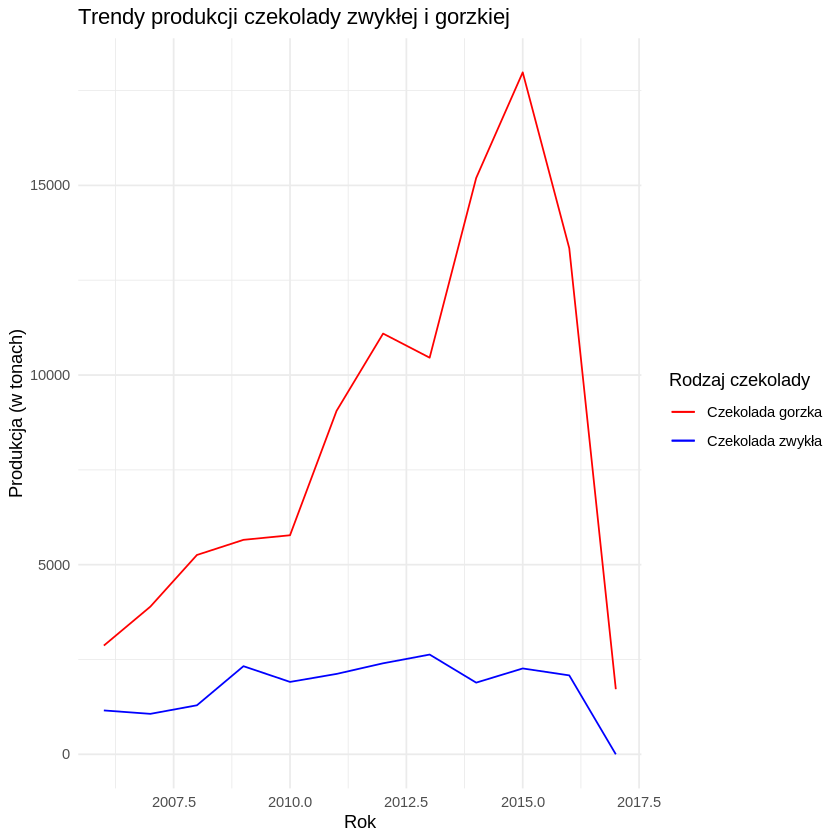

In [ ]:
trendy <- dane %>%
  group_by(Review_Date, Gorzka) %>%
  summarise(Produkcja = sum(Cocoa_Percentage)) %>%
  pivot_wider(names_from = Gorzka, values_from = Produkcja, values_fill = 0)

ggplot(trendy, aes(x = Review_Date)) +
  geom_line(aes(y = `Nie`, color = "Czekolada zwykła")) +
  geom_line(aes(y = `Tak`, color = "Czekolada gorzka")) +
  labs(title = "Trendy produkcji czekolady zwykłej i gorzkiej", x = "Rok", y = "Produkcja (w tonach)", color = "Rodzaj czekolady") +
  scale_color_manual(values = c("Czekolada zwykła" = "blue", "Czekolada gorzka" = "red")) +
  theme_minimal()

## PYTANIE 4 - Który kraj ma najwyższe oceny czekolady?

In [ ]:
srednie_oceny <- dane %>%
  group_by(Company_Location) %>%
  summarise(srednia_ocena = mean(Rating, na.rm = TRUE)) %>%
  arrange(desc(srednia_ocena))

najlepszy_kraj <- srednie_oceny$Company_Location[1]
cat("Kraj z najwyższą średnią oceną czekolady:", najlepszy_kraj, "\n")

Kraj z najwyższą średnią oceną czekolady: Chile 


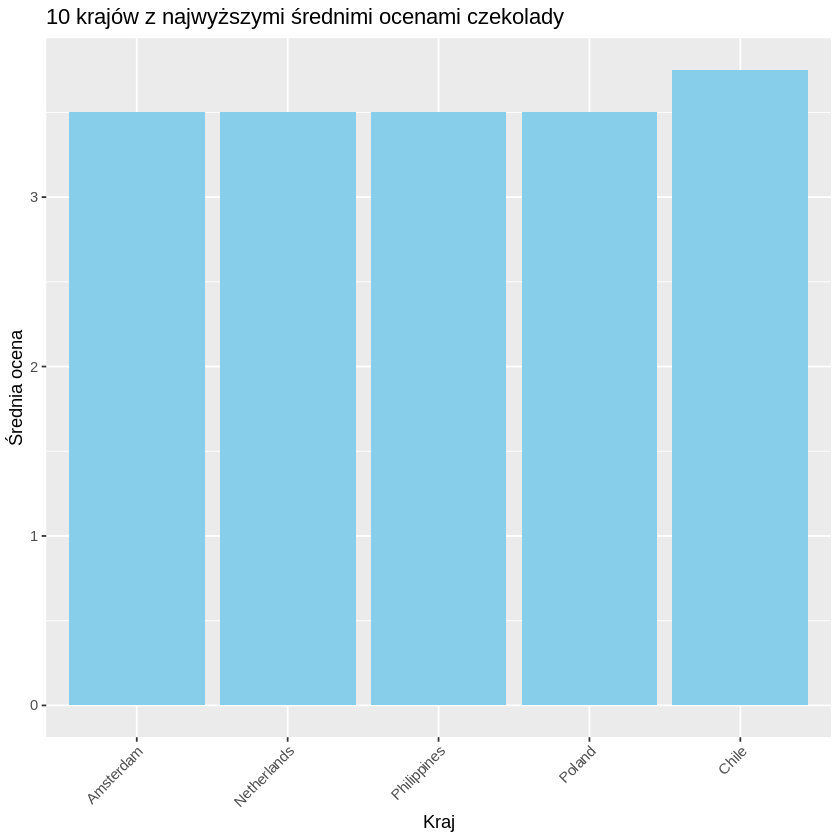

In [ ]:
najlepsze_kraje <- head(srednie_oceny, 5)

ggplot(najlepsze_kraje, aes(x = reorder(Company_Location, srednia_ocena), y = srednia_ocena)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "10 krajów z najwyższymi średnimi ocenami czekolady", x = "Kraj", y = "Średnia ocena") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


## PYTANIE 6 – Jak zmieniały się oceny różnych rodzajów czekoladek na przestrzeni czasu?

`summarise()` has grouped output by 'Review_Date'. You can override using the
`.groups` argument.
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


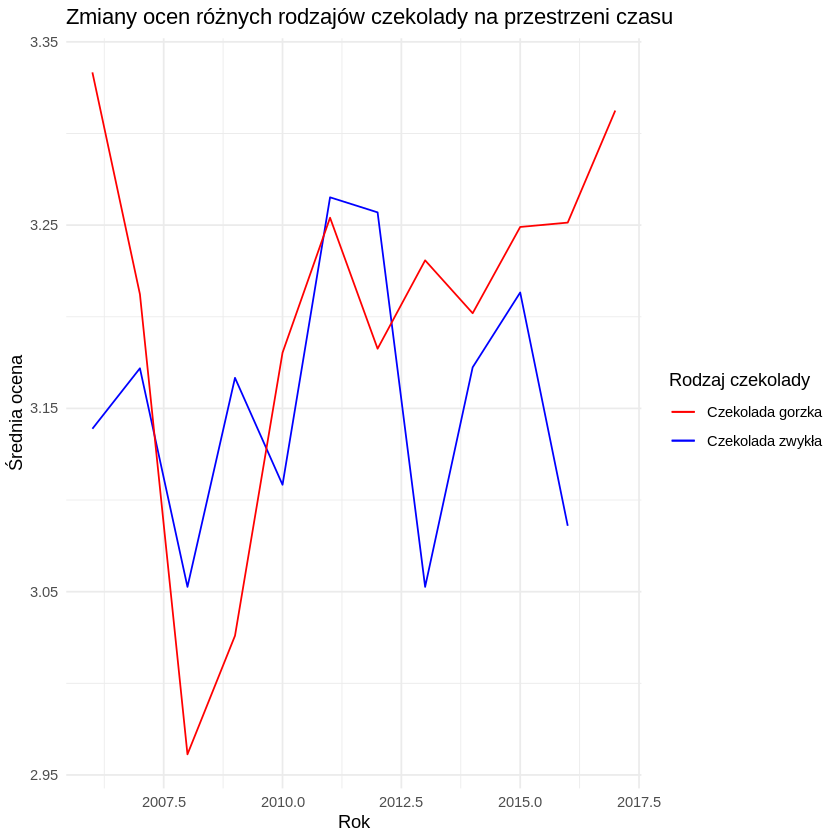

In [ ]:
zmiana_ocen <- dane %>%
  group_by(Review_Date, Gorzka) %>%
  summarise(mean_rating = mean(Rating, na.rm = TRUE)) %>%
  pivot_wider(names_from = Gorzka, values_from = mean_rating, values_fill = NA)

ggplot(zmiana_ocen, aes(x = Review_Date)) +
  geom_line(aes(y = Nie, color = "Czekolada zwykła")) +
  geom_line(aes(y = Tak, color = "Czekolada gorzka")) +
  labs(title = "Zmiany ocen różnych rodzajów czekolady na przestrzeni czasu", x = "Rok", y = "Średnia ocena", color = "Rodzaj czekolady") +
  scale_color_manual(values = c("Czekolada zwykła" = "blue", "Czekolada gorzka" = "red")) +
  theme_minimal()

# Wnioski

Produkcja czekolady zwykłej i gorzkiej: Na podstawie analizy produkcji czekolady zwykłej i gorzkiej można zauważyć, że w ostatnich latach produkcja obu rodzajów czekolady wzrastała. Jednakże, aby lepiej zrozumieć trendy produkcji, warto przeprowadzić analizę czasową na większym zbiorze danych.

Analiza średnich ocen różnych rodzajów czekoladek na przestrzeni czasu pokazała, że istnieją pewne wahania w ocenach w zależności od roku i rodzaju czekolady. Możemy zaobserwować, że niektóre rodzaje czekoladek mogą być bardziej popularne lub cieszyć się większym uznaniem w określonych latach.

Wykres zależności oceny od zawartości kakao wskazuje na ogólny trend, że czekolady o wyższej zawartości kakao mają tendencję do otrzymywania wyższych ocen. Jednakże warto zauważyć, że istnieją pewne odstępstwa od tego trendu, co sugeruje, że inne czynniki mogą również mieć wpływ na ocenę, takie jak jakość składników czy techniki produkcji.

Analiza krajów pod kątem średniej oceny czekolady wykazała, że pewne kraje mogą wyróżniać się jako producenci czekolady o wyższej jakości. To może być użyteczne dla konsumentów, którzy poszukują czekolady z konkretnych regionów.

Wnioski te mogą być przydatne dla firm produkujących czekoladę, handlowców, jak i dla konsumentów, aby zrozumieć trendy na rynku oraz preferencje konsumentów. Dalsza analiza i badania mogą dostarczyć bardziej szczegółowych informacji na temat dynamiki rynku czekolady oraz czynników wpływających na jej ocenę i produkcję.

##Pobierz plik (R_Zadanie_2_imię_nazwisko.jpynb) i prześlij na upel.